### Capstone Project 1: Exploratory Data Analysis
##### Goal - is Apply Below Inferential Statistics Method on Housing Price Project  - to Answers the Question regarding Housing Price
* the z-statistic
* the t-statistic
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
House_Price = pd.read_csv("C:\\Users\\Sandip\\Desktop\\test_data\\Machine_Learning\\train_data.csv")

In [2]:
House_Price.shape

(1175, 43)

In [3]:
House_Price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,Gd,0,Attchd,RFn,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,TA,1,Attchd,RFn,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,Gd,1,Attchd,RFn,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Gd,1,Detchd,Unf,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,Gd,1,Attchd,RFn,836,192,84,12,2008,250000


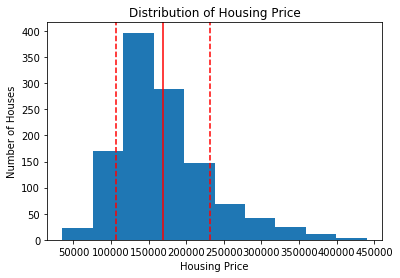

In [6]:
_ = plt.hist(House_Price['SalePrice'], bins=10)
_ = plt.xlabel('Housing Price')
_ = plt.ylabel('Number of Houses')
_ = plt.title('Distribution of Housing Price')
_ = plt.axvline(np.mean(House_Price['SalePrice']) , color='r')
_ = plt.axvline(np.mean(House_Price['SalePrice']) +  np.std(House_Price['SalePrice']), color='r', linestyle='--')
_ = plt.axvline(np.mean(House_Price['SalePrice']) -  np.std(House_Price['SalePrice']), color='r', linestyle='--')

In [7]:
print('Mean :- ', np.mean(House_Price['SalePrice']))
print('Std  :- ', np.std(House_Price['SalePrice']))

Mean :-  169582.65106382978
Std  :-  62558.06014963946


In [9]:
def Housing_Price_sampler(n):
    return np.random.choice(House_Price['SalePrice'], n)

In [13]:
seed(42)
# take your samples here
daily_sample_mean = np.empty(10000)

for i in range(10000):
    daily_sample = Housing_Price_sampler(30)
    daily_sample_mean[i] = np.mean(daily_sample)

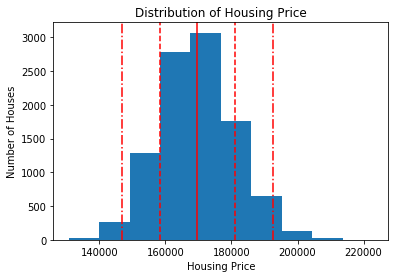

In [36]:
_ = plt.hist(daily_sample_mean, bins=10)
_ = plt.xlabel('Housing Price')
_ = plt.ylabel('Number of Houses')
_ = plt.title('Distribution of Housing Price')
_ = plt.axvline(np.mean(daily_sample_mean), color='r')
_ = plt.axvline(np.mean(daily_sample_mean)+np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)-np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)+(np.std(daily_sample_mean))*2, color='r', linestyle='-.')
_ = plt.axvline(np.mean(daily_sample_mean)-(np.std(daily_sample_mean))*2, color='r', linestyle='-.')

In [15]:
from scipy.stats import norm
s = np.std(daily_sample_mean)
print('Lower Limit of 95% confidence interval using norm.ppf =' ,norm.ppf(0.025, loc=np.mean(daily_sample_mean), scale=s))
print('Upper Limit of 95% confidence interval using norm.ppf =' ,norm.ppf(0.975, loc=np.mean(daily_sample_mean), scale=s))

Lower Limit of 95% confidence interval using norm.ppf = 147425.0833781851
Upper Limit of 95% confidence interval using norm.ppf = 192006.46240848157


### Q: Is overall quality feature  imapct the housing price ?

### _Ans_

* Split the data of housing price into two part houses having overall quality > 5 and quality < 5 
* State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.
* We are testing the hypothesis that the diff in a means is 0 for the two data sets.
* We assume that the diff in variances for the two samples is 0.
* Ho: x̅1 - x̅2 = 0
* Ha: x̅1 - x̅2 ≠ 0

In [24]:
sample_A = House_Price[House_Price['OverallQual'] > 5]['SalePrice']
sample_B = House_Price[House_Price['OverallQual'] < 5]['SalePrice']

In [25]:
s0 = np.std(sample_A)
s1 = np.std(sample_B)
n0 = len(sample_A)
n1 = len(sample_B)
Sp = (((n0 - 1)*(s0 ** 2))+((n1 - 1)*(s1 ** 2))) / (n0 + n1 - 2)
Sp = np.sqrt(Sp)
x0 = np.mean(sample_A)
x1 = np.mean(sample_B)
t = (x0 - x1) / (Sp * np.sqrt(1/n0 + 1/n1))
print('t-Test-statistic :-', t)
print('p-value From t distribution table is :- 1.646')

t-Test-statistic :- 16.996672992744813
p-value From t distribution table is :- 1.646


In [30]:
#House_Price[House_Price['OverallQual'] > 5]['SalePrice']

In [37]:
def Housing_Price_sampler(n):
    return np.random.choice(House_Price[House_Price['OverallQual'] > 5]['SalePrice'], n)

In [38]:
seed(42)
# take your samples here
daily_sample_mean = np.empty(10000)

for i in range(10000):
    daily_sample = Housing_Price_sampler(30)
    daily_sample_mean[i] = np.mean(daily_sample)

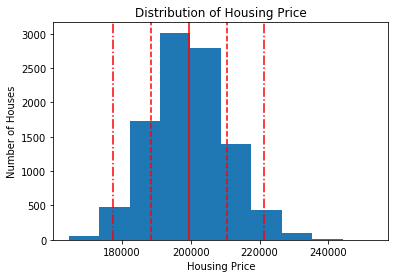

In [39]:
_ = plt.hist(daily_sample_mean, bins=10)
_ = plt.xlabel('Housing Price')
_ = plt.ylabel('Number of Houses')
_ = plt.title('Distribution of Housing Price')
_ = plt.axvline(np.mean(daily_sample_mean), color='r')
_ = plt.axvline(np.mean(daily_sample_mean)+np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)-np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)+(np.std(daily_sample_mean))*2, color='r', linestyle='-.')
_ = plt.axvline(np.mean(daily_sample_mean)-(np.std(daily_sample_mean))*2, color='r', linestyle='-.')

In [40]:
def Housing_Price_sampler(n):
    return np.random.choice(House_Price[House_Price['OverallQual'] < 5]['SalePrice'], n)

In [41]:
seed(42)
# take your samples here
daily_sample_mean = np.empty(10000)

for i in range(10000):
    daily_sample = Housing_Price_sampler(30)
    daily_sample_mean[i] = np.mean(daily_sample)

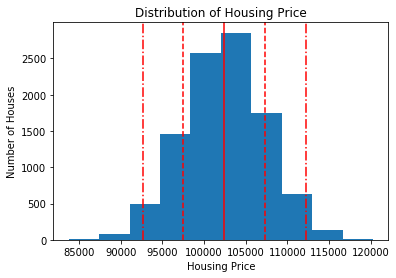

In [42]:
_ = plt.hist(daily_sample_mean, bins=10)
_ = plt.xlabel('Housing Price')
_ = plt.ylabel('Number of Houses')
_ = plt.title('Distribution of Housing Price')
_ = plt.axvline(np.mean(daily_sample_mean), color='r')
_ = plt.axvline(np.mean(daily_sample_mean)+np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)-np.std(daily_sample_mean), color='r', linestyle='--')
_ = plt.axvline(np.mean(daily_sample_mean)+(np.std(daily_sample_mean))*2, color='r', linestyle='-.')
_ = plt.axvline(np.mean(daily_sample_mean)-(np.std(daily_sample_mean))*2, color='r', linestyle='-.')

In [43]:
from scipy.stats import norm
s = np.std(daily_sample_mean)
print('Lower Limit of 95% confidence interval using norm.ppf =' ,norm.ppf(0.025, loc=np.mean(daily_sample_mean), scale=s))
print('Upper Limit of 95% confidence interval using norm.ppf =' ,norm.ppf(0.975, loc=np.mean(daily_sample_mean), scale=s))

Lower Limit of 95% confidence interval using norm.ppf = 92827.16993030962
Upper Limit of 95% confidence interval using norm.ppf = 111988.0606096904
